In [1]:
import pandas as py
d = py.read_csv('Downloads\Iris.csv')
d = d.drop('Id',axis=1)

In [2]:
from sklearn import preprocessing

if d.Species.dtype == 'object':
    label = preprocessing.LabelEncoder()
    label.fit(list(d.Species.values))
    d.Species = label.transform(list(d.Species.values))
    
print(d.Species.dtype)

int64


In [3]:
from sklearn.model_selection import train_test_split

Y = d.Species.values
X = d.drop(['Species'],axis=1).values

x_t, x_te, y_t, y_te = train_test_split(X,Y, test_size= 0.20, random_state=27)

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gn = GaussianNB()
NaiveBayesModel = gn.fit(x_t, y_t)
y_p = NaiveBayesModel.predict(x_te)
accuracy_score(y_te, y_p)

0.9

In [5]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_te,y_p)
print(cm)

[[ 7  0  0]
 [ 0 10  1]
 [ 0  2 10]]


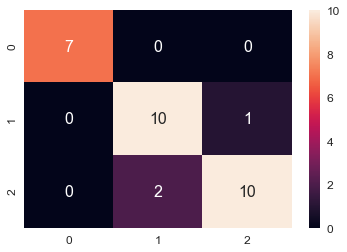

In [7]:
import seaborn as sb

sb.set(font_scale=1.2)
sb.heatmap(py.DataFrame(cm), annot=True,annot_kws={"size": 16})

In [8]:
from sklearn import svm

In [9]:
from sklearn.metrics import average_precision_score

In [12]:
 from sklearn.svm import LinearSVC
x_t, x_te, y_t, y_te = train_test_split(X[Y<2],Y[Y<2], test_size= 0.5)

classifier = svm.LinearSVC(random_state=27)
classifier.fit(x_t, y_t)
y_score = classifier.decision_function(x_te)

average_precision = average_precision_score(y_t, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.62


In [13]:
import numpy as np
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

x_t, x_te, y_t, y_te = train_test_split(X[Y<2],Y[Y<2], test_size= 0.20)

Average precision-recall score: 0.8418893062275415


Text(0,0.5,'Precision')

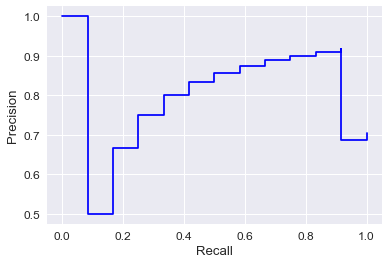

In [15]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

classifier = svm.SVC(kernel='linear', random_state=27)
classifier.fit(x_t, y_t)
y_score = classifier.decision_function(x_te)

print('Average precision-recall score:',average_precision_score(y_te, y_score))
precision, recall, _ = precision_recall_curve(y_te, y_score)

plt.step(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')

Average precision-recall score: 0.8784887566137567


Text(0,0.5,'Precision')

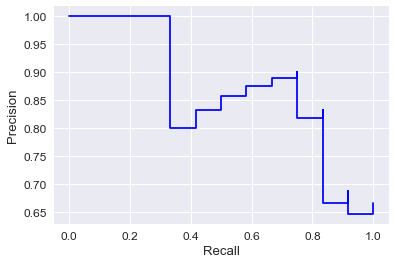

In [16]:
classifier = svm.SVC(kernel='poly', random_state=27)
classifier.fit(x_t, y_t)
y_score = classifier.decision_function(x_te)

print('Average precision-recall score:',average_precision_score(y_te, y_score))
precision, recall, _ = precision_recall_curve(y_te, y_score)

plt.step(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')

Average precision-recall score: 0.8905004173386527


Text(0,0.5,'Precision')

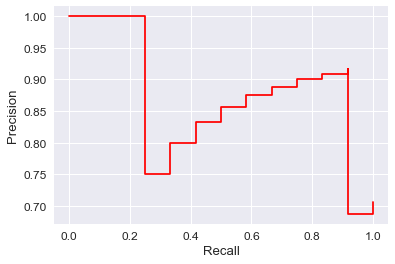

In [17]:
classifier = svm.SVC(kernel='rbf', random_state=27)
classifier.fit(x_t, y_t)
y_score = classifier.decision_function(x_te)

print('Average precision-recall score:',average_precision_score(y_te, y_score))
precision, recall, _ = precision_recall_curve(y_te, y_score)

plt.step(recall, precision, color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')